# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [14]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df['flag_doente'] = (df['num'] != 0).astype('int64')

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [16]:
# Montando uma bivariada para a variável sex com as seguintes estatísticas:

tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True) # Número de saudáveis, Número de doentes, Total de doentes
tab['média_doentes'] = tab[1]/tab['All'] # Quantidade média de doentes
tab['odds'] = tab[1]/tab[0] # odds
tab['RC_vs_All'] = tab['odds']/tab.loc['All','odds'] # Odds ratio (Use o total como referência)
tab['logito'] = np.log(tab['odds']) # Logito (LOG(Odds))
tab['woe'] = np.log(tab['RC_vs_All']) # O LOG do Odds ratio (com o total como referência) - WOE

tab



flag_doente,0,1,All,média_doentes,odds,RC_vs_All,logito,woe
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [17]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [25]:
# Categorizando a variável age em 5 grupos

df.loc[(df['age'] >= 28) & (df['age'] < 38), 'grupo_age'] = '28 - 38'
df.loc[(df['age'] >= 38) & (df['age'] < 48), 'grupo_age'] = '38 - 48'
df.loc[(df['age'] >= 48) & (df['age'] < 58), 'grupo_age'] = '48 - 58'
df.loc[(df['age'] >= 58) & (df['age'] < 68), 'grupo_age'] = '58 - 68'
df.loc[(df['age'] >= 68) & (df['age'] < 78), 'grupo_age'] = '68 - 78'



In [28]:
# Montando uma bivariada para a variável grupo_age com as seguintes estatísticas:

tab_2 = pd.crosstab(df['grupo_age'], df['flag_doente'], margins= True) # Número de saudáveis, Número de doentes, Total de doentes
tab_2['média_doentes'] = tab_2[1]/tab_2['All'] # Quantidade média de doentes
tab_2['odds'] = tab_2[1]/tab_2[0] # odds
tab_2['RC_vs_All'] = tab_2['odds']/tab_2.loc['All','odds'] # Odds ratio (Use o total como referência)
tab_2['logito'] = np.log(tab_2['odds']) # Logito (LOG(Odds))
tab_2['woe'] = np.log(tab_2['RC_vs_All']) # O LOG do Odds ratio (com o total como referência) - WOE

tab_2

flag_doente,0,1,All,média_doentes,odds,RC_vs_All,logito,woe
grupo_age,,,,,,,,
28 - 38,7,2,9,0.222222,0.285714,0.337102,-1.252763,-1.087370
38 - 48,47,19,66,0.287879,0.404255,0.476963,-0.905709,-0.740316
48 - 58,60,44,104,0.423077,0.733333,0.865228,-0.310155,-0.144762
58 - 68,40,67,107,0.626168,1.675000,1.976259,0.515813,0.681206
68 - 78,10,7,17,0.411765,0.700000,0.825899,-0.356675,-0.191282
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [29]:
# Calculando o valor médio da variável age

df['age'].mean()

54.43894389438944

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Axes: xlabel='grupo_age'>

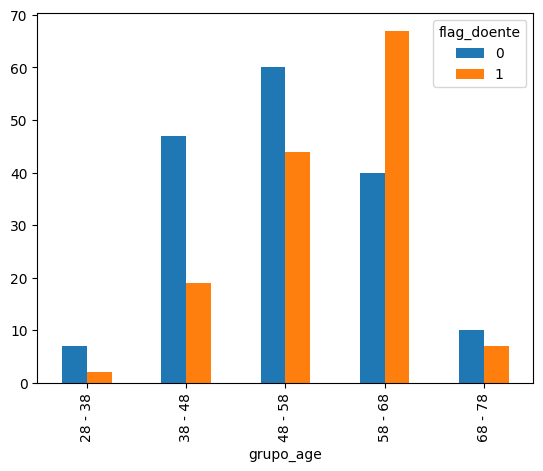

In [45]:
tab_2.iloc[0:5, :2].plot(kind='bar')